In [11]:
!pwd

/c/Users/osori/Desktop/project/corey_pandas/10-Datetime-Timeseries


In [91]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('../data/ETH_1h.csv')

In [37]:
df.drop(columns='Unix Timestamp', inplace=True)

In [38]:
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...
34492,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
34493,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
34494,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
34495,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075


In [39]:
df.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [19]:
df.shape

(34497, 7)

In [21]:
df.loc[0,'Date']

'2020-04-16 00:00:00'

In [23]:
df.loc[0,'Date'].day_name() # 해당 컬럼이 float 데이터 유형이 되어야 day_name() 메서드 사용 가능

AttributeError: 'str' object has no attribute 'day_name'

In [35]:
pd.to_datetime(df['Date'])

0       2020-04-16 00:00:00
1       2020-04-15 23:00:00
2       2020-04-15 22:00:00
3       2020-04-15 21:00:00
4       2020-04-15 20:00:00
                ...        
34492   2016-05-09 17:00:00
34493   2016-05-09 16:00:00
34494   2016-05-09 15:00:00
34495   2016-05-09 14:00:00
34496   2016-05-09 13:00:00
Name: Date, Length: 34497, dtype: datetime64[ns]

In [40]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

In [41]:
df['Date']

0       2020-04-16 00:00:00
1       2020-04-15 23:00:00
2       2020-04-15 22:00:00
3       2020-04-15 21:00:00
4       2020-04-15 20:00:00
                ...        
34492   2016-05-09 17:00:00
34493   2016-05-09 16:00:00
34494   2016-05-09 15:00:00
34495   2016-05-09 14:00:00
34496   2016-05-09 13:00:00
Name: Date, Length: 34497, dtype: datetime64[ns]

In [47]:
df.loc[0,'Date'].day_name()

'Thursday'

In [50]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') # 더이상 lambda 사용 X
df = pd.read_csv('../data/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

<ipython-input-50-d650c62ef6e7>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


In [54]:
df['Date']

0       2020-04-16 00:00:00
1       2020-04-15 23:00:00
2       2020-04-15 22:00:00
3       2020-04-15 21:00:00
4       2020-04-15 20:00:00
                ...        
34492   2016-05-09 17:00:00
34493   2016-05-09 16:00:00
34494   2016-05-09 15:00:00
34495   2016-05-09 14:00:00
34496   2016-05-09 13:00:00
Name: Date, Length: 34497, dtype: datetime64[ns]

In [52]:
df['Date'].dt.day_name()

0         Thursday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
34492       Monday
34493       Monday
34494       Monday
34495       Monday
34496       Monday
Name: Date, Length: 34497, dtype: object

In [55]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [56]:
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,Thursday
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,Wednesday
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279,Wednesday
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131,Wednesday
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622,Wednesday
...,...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213,Monday
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450,Monday
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567,Monday
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075,Monday


In [57]:
df['Date'].min()

Timestamp('2016-05-09 13:00:00')

In [58]:
df['Date'].max()

Timestamp('2020-04-16 00:00:00')

In [59]:
df['Date'].max() - df['Date'].min()

Timedelta('1437 days 11:00:00')

In [63]:
filt = (df['Date' ] >= '2019') & (df['Date' ] < '2020')

In [64]:
df.loc[filt]

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
2545,1577833200000,2019-12-31 23:00:00,ETHUSD,128.68,128.85,127.82,128.84,857.650259,Tuesday
2546,1577829600000,2019-12-31 22:00:00,ETHUSD,128.40,128.93,127.77,128.68,3050.507350,Tuesday
2547,1577826000000,2019-12-31 21:00:00,ETHUSD,127.87,128.41,127.81,128.40,447.680372,Tuesday
2548,1577822400000,2019-12-31 20:00:00,ETHUSD,127.86,128.30,127.86,127.87,151.711128,Tuesday
2549,1577818800000,2019-12-31 19:00:00,ETHUSD,128.78,128.78,127.86,127.86,2450.933248,Tuesday
...,...,...,...,...,...,...,...,...,...
11297,1546315200000,2019-01-01 04:00:00,ETHUSD,130.83,133.75,130.83,132.09,1035.840465,Tuesday
11298,1546311600000,2019-01-01 03:00:00,ETHUSD,129.79,131.00,129.79,130.83,1307.299291,Tuesday
11299,1546308000000,2019-01-01 02:00:00,ETHUSD,130.98,130.98,129.25,129.79,837.808380,Tuesday
11300,1546304400000,2019-01-01 01:00:00,ETHUSD,131.10,131.10,128.72,130.98,965.092541,Tuesday


In [71]:
df.set_index('Date', inplace=True)

In [72]:
df

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125,Thursday
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,Wednesday
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279,Wednesday
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131,Wednesday
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622,Wednesday
...,...,...,...,...,...,...,...,...
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213,Monday
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450,Monday
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567,Monday


In [80]:
df['2020-02':'2020-01']

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,,
2020-02-29 23:00:00,1583017200000,ETHUSD,222.93,223.96,217.26,217.35,1247.560462,Saturday
2020-02-29 22:00:00,1583013600000,ETHUSD,223.59,223.76,222.32,222.93,118.446008,Saturday
2020-02-29 21:00:00,1583010000000,ETHUSD,224.81,225.08,223.05,223.59,191.602533,Saturday
2020-02-29 20:00:00,1583006400000,ETHUSD,225.56,225.56,223.55,224.81,158.232905,Saturday
2020-02-29 19:00:00,1583002800000,ETHUSD,225.05,225.92,224.06,225.56,174.783652,Saturday
...,...,...,...,...,...,...,...,...
2020-01-01 04:00:00,1577851200000,ETHUSD,129.83,129.96,129.13,129.54,2807.129465,Wednesday
2020-01-01 03:00:00,1577847600000,ETHUSD,130.25,130.30,129.42,129.83,883.017780,Wednesday
2020-01-01 02:00:00,1577844000000,ETHUSD,129.95,130.58,129.95,130.25,527.921168,Wednesday


In [82]:
df['2020-02':'2020-01']['Close'].mean()

195.22266666666667

In [86]:
df['2020-02':'2020-01'].head(24)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,,
2020-02-29 23:00:00,1583017200000,ETHUSD,222.93,223.96,217.26,217.35,1247.560462,Saturday
2020-02-29 22:00:00,1583013600000,ETHUSD,223.59,223.76,222.32,222.93,118.446008,Saturday
2020-02-29 21:00:00,1583010000000,ETHUSD,224.81,225.08,223.05,223.59,191.602533,Saturday
2020-02-29 20:00:00,1583006400000,ETHUSD,225.56,225.56,223.55,224.81,158.232905,Saturday
2020-02-29 19:00:00,1583002800000,ETHUSD,225.05,225.92,224.06,225.56,174.783652,Saturday
2020-02-29 18:00:00,1582999200000,ETHUSD,225.37,225.99,224.65,225.05,388.282143,Saturday
2020-02-29 17:00:00,1582995600000,ETHUSD,222.94,225.39,222.27,225.37,198.134810,Saturday
2020-02-29 16:00:00,1582992000000,ETHUSD,225.43,226.06,222.43,222.94,79.720833,Saturday
2020-02-29 15:00:00,1582988400000,ETHUSD,223.31,226.04,221.66,225.43,41.941194,Saturday


In [93]:
df['2020-01-01']['High'].max()

AssertionError: <class 'numpy.ndarray'>

In [102]:
highs = df['High'].resample('D').max()
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [103]:
highs['2020-01-01']


132.57

In [105]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

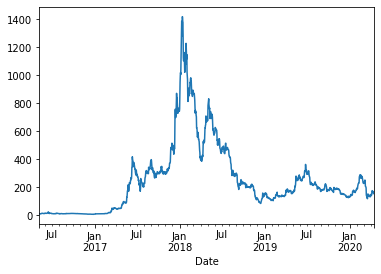

In [106]:
highs.plot()

In [108]:
df.drop(columns='Unix Timestamp', inplace=True)

In [109]:
df.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-15,10.140387,10.310516,10.052387,10.205290,70.896402
2016-05-22,13.042262,13.144048,12.965179,13.066964,242.104139
2016-05-29,12.481012,12.555536,12.385357,12.471012,345.546483
2016-06-05,13.586369,13.651667,13.542202,13.594583,281.854432
2016-06-12,14.287500,14.326190,14.260179,14.297798,309.536737
...,...,...,...,...,...
2020-03-22,124.640952,126.387917,122.802262,124.636012,2618.930260
2020-03-29,133.274762,134.287857,132.255714,133.285893,1374.652289
2020-04-05,137.517083,138.314583,136.791310,137.627440,898.945625


In [111]:
df.resample('W').agg({'Close':'mean','High':'max', 'Low':'min', 'Volume':'sum'}).iloc[0]

Close        10.205290
High         12.000000
Low           0.000000
Volume    10988.942273
Name: 2016-05-15 00:00:00, dtype: float64